In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #because classification problems are NLP
from nltk.corpus import stopwords #NLP based library in python
from sklearn.preprocessing import LabelEncoder #Level encoder because supervised ML cases need to be encoded
from sklearn.model_selection import train_test_split #split data 80% training and 20% testing
from sklearn.feature_extraction.text import TfidfVectorizer #convert textual data into vectors
from sklearn.metrics import accuracy_score
plt.style.use('seaborn-v0_8-darkgrid')

In [46]:
df = pd.read_csv("UpdatedResumeDataSet.csv") #load dataset #define df

In [14]:
df.head() #to see a sample

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [15]:
df.sample(5)

,Category,Resume
535,Operations Manager,Education Details \r\n BCA Vinayaka Missions...
795,ETL Developer,TechnicalProficiencies DB: Oracle 11g Domains:...
136,Arts,"Additional qualifications April 2000, Web Desi..."
80,HR,KEY SKILLS: â¢ Computerized accounting with t...
17,Data Science,Education Details \r\n B.Tech Rayat and Bahr...


In [17]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [18]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [19]:
#Data Visualisation

Text(0, 0.5, 'Count')

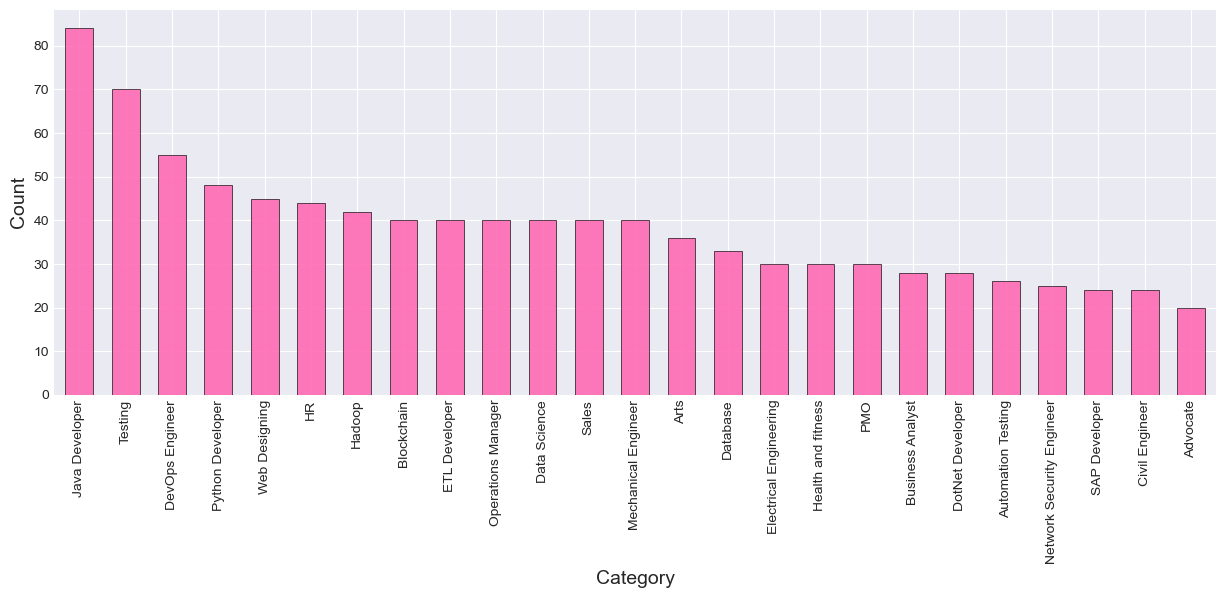

In [19]:
plt.figure(figsize=(15,5))
ax = df['Category'].value_counts().plot(
    kind='bar',
    color='#FF69B4',        # Hot pink color
    edgecolor='black',
    width=0.6,
    alpha=0.9
)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

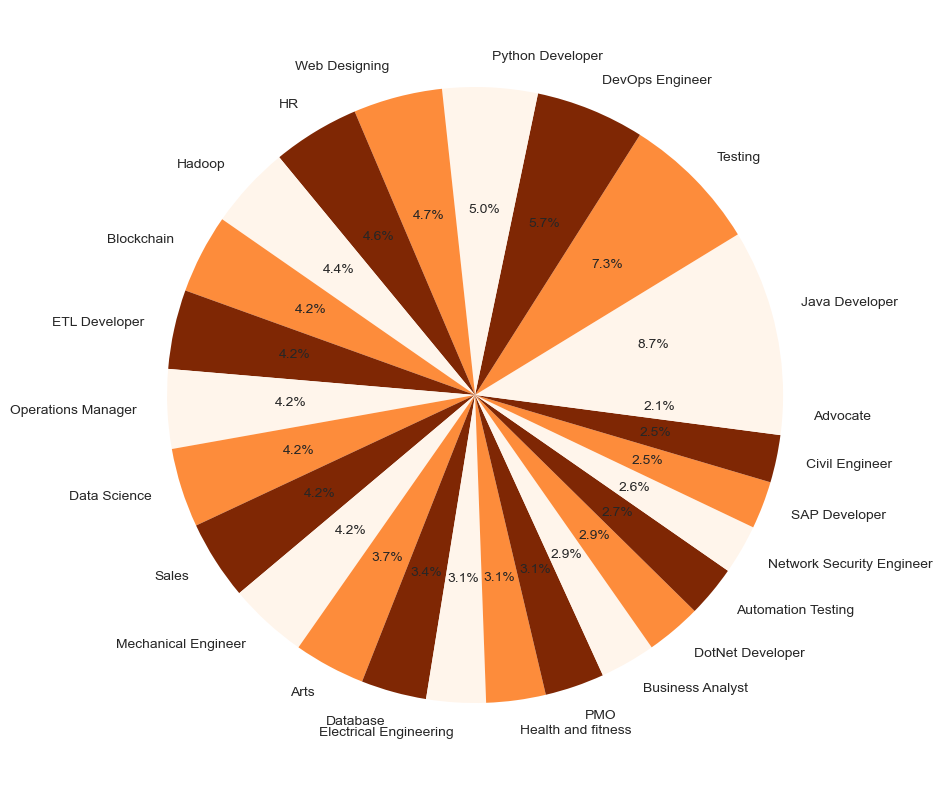

In [33]:
counts = df['Category'].value_counts()
labels = counts.index  #value_counts index for matching labels
plt.figure(figsize=(15, 10))

# Plot pie chart
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

In [34]:
#Text cleaning with NLP
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [35]:
#Remove URL, Remove Emails, Remove Special Character, Remove stop words

In [49]:
#import stopwords from nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [75]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text) #removing email pattern from cleaned texts

    #removing special characters
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    #removing stopwords
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)

    return clean_text

In [76]:
s = 'Hello, $%& I found this # article at https://www.article.com ! You can contact me at name@example.com'

In [77]:
clean(s)

'Hello found article contact'

In [78]:
df['Resume'] = df['Resume'].apply(lambda x:clean(x))

In [80]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [ ]:
#Encoding -> convert text in the Category field of dataset into numerics

In [83]:
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [84]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [ ]:
#Vectorization -> convert numerics into vectors

In [85]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [ ]:
#Splitting data for training and testing

In [86]:
X_train, X_test, y_train, y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)

In [87]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [88]:
X_train.shape

(769, 8017)

In [89]:
y_train.shape

(769,)

In [90]:
X_test.shape

(193, 8017)

In [91]:
y_test.shape

(193,)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN Classifier on Test Data -> :{accuracy}")

Accuracy of the KNN Classifier on Test Data -> :0.9844559585492227


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [105]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'MultinomialNB':MultinomialNB(),
    'OneVsRestClassifier':OneVsRestClassifier(KNeighborsClassifier())
}

In [111]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuracy of {model_name} on test data:{accuracy}")

#best model
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nBest Model: {best_model} with accuracy {accuracy_scores[best_model]:.4f}")

Accuracy of KNeighborsClassifier on test data:0.9844559585492227
Accuracy of LogisticRegression on test data:0.9948186528497409
Accuracy of RandomForestClassifier on test data:0.9896373056994818
Accuracy of SVC on test data:0.9948186528497409
Accuracy of MultinomialNB on test data:0.9792746113989638
Accuracy of OneVsRestClassifier on test data:0.9844559585492227

Best Model: LogisticRegression with accuracy 0.9948
